<a href="https://colab.research.google.com/github/MM21B038/Fraud-Detection-Using-Hybrid-Deep-Learning-Model/blob/master/Fraud_Detection_Hybrid_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Making a hybrid Deep Learning Model

#Part 1 - SOM concept for unstructured dataset

##Install CSGT Package

In [35]:
!pip install CSGT

## Importing the libraries


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [37]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [39]:
from CSGT import CSGT
som = CSGT(x=10, y=10, input_len= 15, sigma= 3, learning_rate = 0.5)
som.initialize_weight()
# Train the SOM with 10,000 epochs
som.train(X, epoch = 10000)

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
SOM Model Training Completed


##Visualizing the results


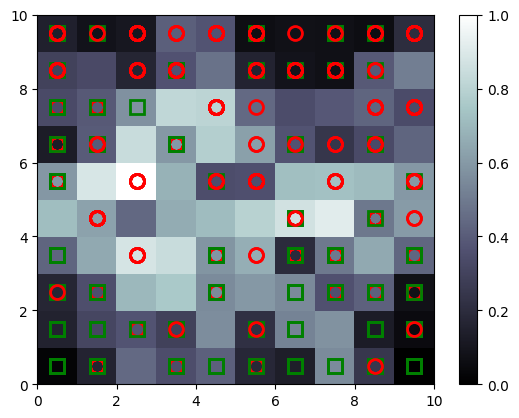

In [40]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map(X).T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.bestMatchingNeuron(X, i)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

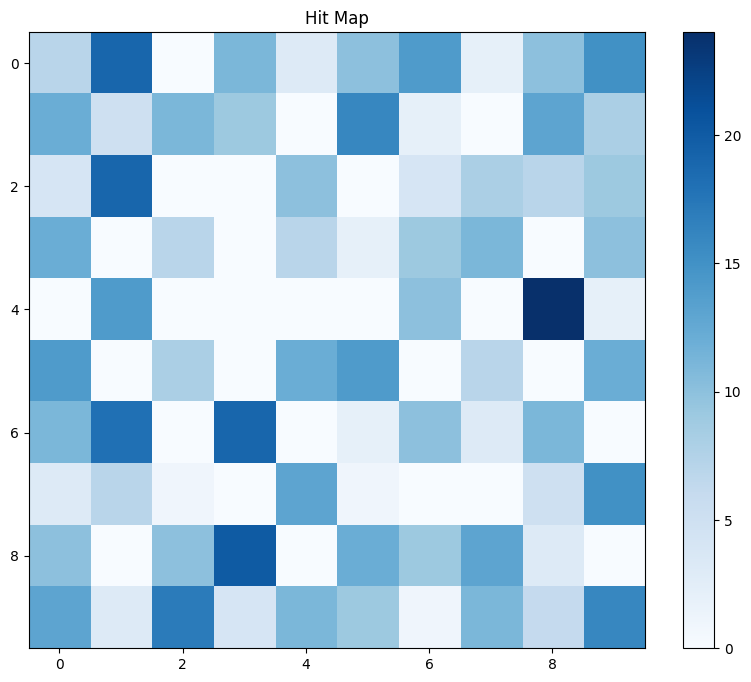

In [41]:
som.plot_hit_map(X)

In [43]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,4)], mappings[(3,6)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15587297
15682540
15625501
15711249
15658504
15700046
15569595
15587443
15711759
15665181
15786237
15590434
15767358
15567839
15671014
15579583
15642336
15740487
15593345
15811742
15702571
15622083
15646190
15715907
15768342
15748532
15689692
15672357
15788634


## Finding the frauds


##Printing the Fraud Clients

#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [44]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [45]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [47]:
import tensorflow as tf
tf.__version__

'2.17.0'

## Initializing the ANN

In [48]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [49]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

## Adding the output layer

In [50]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [51]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [52]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8025 - loss: 0.4794
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9422 - loss: 0.2317
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9679 - loss: 0.1202
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9548 - loss: 0.1127
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9616 - loss: 0.0842
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9484 - loss: 0.0898
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9660 - loss: 0.0626
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0557
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0531
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9923 - loss: 0.0302


## Predicting test set results

In [56]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [57]:
y_pred

array([[1.57761560e+07, 1.75554387e-03],
       [1.57395480e+07, 4.17339703e-04],
       [1.56628540e+07, 1.39742382e-02],
       ...,
       [1.56754500e+07, 5.35279661e-02],
       [1.57764940e+07, 2.75117491e-04],
       [1.55924120e+07, 4.14552851e-05]])

In [62]:
y_pred = y_pred[y_pred[:, 1].argsort()]

In [68]:
y_pred[:, 1] = y_pred[:, 1] * 100

In [69]:
y_pred = y_pred.astype(int)

In [70]:
print(y_pred)

[[15621423        0]
 [15799785        0]
 [15790113        0]
 ...
 [15682540       78]
 [15786237       78]
 [15593345       84]]


In [71]:
df = pd.DataFrame(y_pred, columns = ['CustomerId', 'Probability*100'])

In [74]:
df.tail()

,CustomerId,Probability*100
685,15715907,73
686,15767358,76
687,15682540,78
688,15786237,78
689,15593345,84


In [75]:
df_frauds = df[df['Probability*100'] > 65]

In [76]:
df_frauds.to_excel('fraud_customers.xlsx')